In [ ]:
#PLEASE CONSIDER THIS IS NOT A VALIDATION METHOD TO ASSESS ACCURACY AND VERACITY OF CLASSIFICATION,
#IT IS JUST A PROXY TO ANALYZE AGREEMENT ACROSS MODELS AND CHECK WHETHER THEY ALIGN OR NOT.

In [ ]:
!pip install pandas==1.5.3 numpy==1.24.3
import pandas as pd

try:
  df = pd.read_excel('/content/llm google.xlsx')
  print(df.head()) # Print the first few rows to verify
except FileNotFoundError:
  print("File not found. Make sure the file is uploaded to /content/llm google.xlsx")
except Exception as e:
  print(f"An error occurred: {e}")

         guid                                              title  \
0  1033011463  North Korea to launch satellites to monitor US...   
1  1034554118  European air safety group warns unidentified s...   
2  1031205500  SpaceX Shipment of Starlink Satellite-Internet...   
3  1031206444  A Truck Loaded With SpaceX Starlink Terminals ...   
4  1035263277  OneWeb turns to SpaceX for satellite launches ...   

                                         description  \
0  North Korean leader Kim Jong Un inspects North...   
1  The European Union Aviation Safety Agency said...   
2  A shipment of SpaceX's Starlink satellite-inte...   
3  Ukraine’s vice prime minister, Mykhailo Fedoro...   
4  Ryan Daws is a senior editor at TechForge Medi...   

                                            raw_resp  \
0  <<<RESPONSE_START>>>\nDetected Language: en\n<...   
1  <<<RESPONSE_START>>>\nDetected Language: en\n<...   
2  <<<RESPONSE_START>>>\nDetected Language: en\n<...   
3  <<<RESPONSE_START>>>\nDetec

In [ ]:
# Correct the typo in the feature list
features = [
    "skip",
    "Abuse of Leaked Data",
    "Space Weather Events",
    "Abuse / Falsification of Rights",
    "Compromising Confidential Information (Data Breaches): Exfiltration",
    "Denial of Service (DoS)",
    "Data Modification",
    "Electromagnetic Interference",
    "Firmware Corruption",
    "Identity Theft",
    "Malicious Code / Software / Activity: Cryptographic Exploit",
    "Malicious Code / Software / Activity: Malicious Injection",
    "Malicious Code / Software / Activity: Network Exploit",
    "Malicious Code / Software / Activity: Software and vulnerabilities exploit",
    "Manipulation of Hardware and Software: Zero-Day Exploit",
    "Preventing Services",
    "Resource Exhaustion",
    "Seizure of Control: Satellite Bus",
    "Social Engineering",
    "Spoofing",
    "Supply Chain Compromise",
    "Theft of Authentication Information",
    "Unauthorised Modifications: Parameters",
    "Jamming",
    "Unauthorised Use of Equipment",
    "Hijacking",
    "Interception of Communication",
    "Man-in-the-middle", # Corrected typo
    "Network Manipulation (Bus-Payload Link",
    "Network Traffic Manipulation (TC - Telecommand)",
    "Position Detection (Telemetry)",
    "Replay of Recorded Authentic Communication Traffic",
    "Unauthorised Access",
    "Coercion, Extortion or Corruption",
    "Damage / Destruction of Segment Assets",
    "Damage / Destruction of the Satellite via the Use of ASAT (Anti-Satellite Weapon) / Proximity Operations",
    "Loss During Shipping",
    "Sabotage Through Hardware / Software",
    "Unauthorized Physical Access",
    "Unintentional Damage (UD)",
    "Lack of Segregation",
    "Operating Errors",
    "Software Misconfiguration",
    "Inadequate Security Planning / Management"
]

# Iterate through the features and create new columns
for feature in features:
    # Escape special characters in the feature name for regex
    escaped_feature = feature.replace('(', '\(').replace(')', '\)').replace('/', '\/').replace('-', '\-')
    # Create a new column with integer values (0 or 1) based on whether the feature is in 'threat_sub_type'
    # We use regex to match the feature name potentially surrounded by other characters
    df[feature] = df['threat_sub_type'].str.contains(escaped_feature, na=False).astype(int) # Convert boolean to int (0 or 1)

# Display the updated DataFrame with new columns
print(df.head())

# Save the updated DataFrame to a new Excel file
df.to_excel("google_bool.xlsx", index=False)

print("DataFrame saved to llama_bool.xlsx")

         guid                                              title  \
0  1033011463  North Korea to launch satellites to monitor US...   
1  1034554118  European air safety group warns unidentified s...   
2  1031205500  SpaceX Shipment of Starlink Satellite-Internet...   
3  1031206444  A Truck Loaded With SpaceX Starlink Terminals ...   
4  1035263277  OneWeb turns to SpaceX for satellite launches ...   

                                         description  \
0  North Korean leader Kim Jong Un inspects North...   
1  The European Union Aviation Safety Agency said...   
2  A shipment of SpaceX's Starlink satellite-inte...   
3  Ukraine’s vice prime minister, Mykhailo Fedoro...   
4  Ryan Daws is a senior editor at TechForge Medi...   

                                            raw_resp  \
0  <<<RESPONSE_START>>>\nDetected Language: en\n<...   
1  <<<RESPONSE_START>>>\nDetected Language: en\n<...   
2  <<<RESPONSE_START>>>\nDetected Language: en\n<...   
3  <<<RESPONSE_START>>>\nDetec

In [ ]:
# Installazione delle librerie necessarie (se non già installate)
!pip install pandas openpyxl

import pandas as pd
import re
from IPython.display import display

# 1) Caricamento dei file
df_deep    = pd.read_excel("/content/deepseek_bool.xlsx")
df_llama   = pd.read_excel("/content/llama_bool.xlsx")
df_mistral = pd.read_excel("/content/mistral_bool.xlsx")
df_google  = pd.read_excel("/content/google_bool.xlsx")

# 2) Tutti i guid in stringa
for df in (df_deep, df_llama, df_mistral, df_google):
    df['guid'] = df['guid'].astype(str)

# 3) Funzione per normalizzare nomi di colonna
def normalize(text):
    return re.sub(r'[^a-z0-9]', '', text.lower())

# 4) Lista ufficiale delle minacce
features = [
    "skip",
    "Abuse of Leaked Data",
    "Abuse / Falsification of Rights",
    "Compromising Confidential Information (Data Breaches): Exfiltration",
    "Denial of Service (DoS)",
    "Data Modification",
    "Electromagnetic Interference",
    "Firmware Corruption",
    "Identity Theft",
    "Malicious Code / Software / Activity: Cryptographic Exploit",
    "Malicious Code / Software / Activity: Malicious Injection",
    "Malicious Code / Software / Activity: Network Exploit",
    "Malicious Code / Software / Activity: Software and vulnerabilities exploit",
    "Manipulation of Hardware and Software: Zero-Day Exploit",
    "Preventing Services",
    "Resource Exhaustion",
    "Seizure of Control: Satellite Bus",
    "Social Engineering",
    "Spoofing",
    "Supply Chain Compromise",
    "Theft of Authentication Information",
    "Unauthorised Modifications: Parameters",
    "Jamming",
    "Unauthorised Use of Equipment",
    "Hijacking",
    "Interception of Communication",
    "Man-in-the-middle",
    "Network Manipulation (Bus-Payload Link)",  # attenzione: qui è completo
    "Network Traffic Manipulation (TC - Telecommand)",
    "Position Detection (Telemetry)",
    "Replay of Recorded Authentic Communication Traffic",
    "Space Weather Events",
    "Unauthorised Access",
    "Coercion, Extortion or Corruption",
    "Damage / Destruction of Segment Assets",
    "Damage / Destruction of the Satellite via the Use of ASAT (Anti-Satellite Weapon) / Proximity Operations",
    "Loss During Shipping",
    "Sabotage Through Hardware / Software",
    "Unauthorized Physical Access",
    "Unintentional Damage (UD)",
    "Lack of Segregation",
    "Operating Errors",
    "Software Misconfiguration",
    "Inadequate Security Planning / Management"
]

# Normalizzazione nomi
normalized_features = {normalize(f): f for f in features}

# 5) Funzione per trovare le colonne simili anche se troncate
def find_feature_columns(df):
    found = {}
    normalized_cols = {normalize(c): c for c in df.columns}
    for norm_f, original_f in normalized_features.items():
        if norm_f in normalized_cols:
            found[original_f] = normalized_cols[norm_f]
        else:
            # tentativo più permissivo: partial match
            for norm_col, orig_col in normalized_cols.items():
                if norm_f in norm_col:
                    found[original_f] = orig_col
                    break
    return found

# 6) Creazione tabella con minacce rilevate per riga
dfs = {
    'deepseek': df_deep,
    'llama': df_llama,
    'mistral': df_mistral,
    'google': df_google
}

records = []

# Usa DeepSeek come base (GUID)
for i, row in df_deep.iterrows():
    guid = row['guid']
    rec = {'guid': guid}

    for name, df in dfs.items():
        threats = []
        if guid in df['guid'].values:
            row_df = df[df['guid'] == guid].iloc[0]
            matched_cols = find_feature_columns(df)
            for threat_name, colname in matched_cols.items():
                try:
                    if pd.notna(row_df[colname]) and int(row_df[colname]) == 1:
                        threats.append(threat_name)
                except:
                    continue
        rec[f'{name}_threats'] = threats
    records.append(rec)

df_threats = pd.DataFrame(records)

# 7) Esportazione del risultato
output_path = "/content/combined_threat_lists.csv"
df_threats.to_csv(output_path, index=False)
display(df_threats.head(10))
print(f"✅ File salvato in: {output_path}")


,guid,deepseek_threats,llama_threats,mistral_threats,google_threats
0,1033011463,"[Supply Chain Compromise, Damage / Destruction...",[skip],"[Abuse / Falsification of Rights, Interception...","[Supply Chain Compromise, Damage / Destruction..."
1,1034554118,"[Spoofing, Jamming]","[Spoofing, Jamming]","[Spoofing, Jamming, Interception of Communicat...","[Spoofing, Jamming]"
2,1033802407,"[Firmware Corruption, Malicious Code / Softwar...","[Denial of Service (DoS), Firmware Corruption,...","[Firmware Corruption, Malicious Code / Softwar...",[]
3,1031205500,[skip],[skip],[skip],[Jamming]
4,1031206444,[skip],[skip],"[Denial of Service (DoS), Hijacking, Intercept...",[Jamming]
5,1031084182,"[Denial of Service (DoS), Jamming, Interceptio...",[skip],"[Denial of Service (DoS), Interception of Comm...",[]
6,1035263277,[skip],[skip],"[Abuse / Falsification of Rights, Supply Chain...",[skip]
7,1033028196,[Jamming],"[Electromagnetic Interference, Jamming]","[Jamming, Interception of Communication, Damag...",[Jamming]
8,1031469191,"[Supply Chain Compromise, Interception of Comm...",[skip],"[Supply Chain Compromise, Interception of Comm...",[Supply Chain Compromise]
9,1031759990,"[Denial of Service (DoS), Jamming, Hijacking, ...","[Denial of Service (DoS), Malicious Code / Sof...","[Denial of Service (DoS), Hijacking, Intercept...",[]


✅ File salvato in: /content/combined_threat_lists.csv


In [ ]:
# 1. Visualizza le colonne originali del file DeepSeek
print("🔎 Colonne in df_deep:")
for col in df_deep.columns:
    print(f"→ '{col}'")

# 2. Normalizza tutte le colonne per confronto
print("\n🧪 Colonne normalizzate:")
for col in df_deep.columns:
    print(f"{col} → {re.sub(r'[^a-z0-9]', '', col.lower())}")


🔎 Colonne in df_deep:
→ 'guid'
→ 'title'
→ 'description'
→ 'raw_resp'
→ 'threat_sub_type'
→ 'skip'
→ 'Abuse of Leaked Data'
→ 'Abuse / Falsification of Rights'
→ 'Compromising Confidential Information (Data Breaches): Exfiltration'
→ 'Denial of Service (DoS)'
→ 'Data Modification'
→ 'Electromagnetic Interference'
→ 'Firmware Corruption'
→ 'Identity Theft'
→ 'Malicious Code / Software / Activity: Cryptographic Exploit'
→ 'Malicious Code / Software / Activity: Malicious Injection'
→ 'Malicious Code / Software / Activity: Network Exploit'
→ 'Malicious Code / Software / Activity: Software and vulnerabilities exploit'
→ 'Manipulation of Hardware and Software: Zero-Day Exploit'
→ 'Preventing Services'
→ 'Resource Exhaustion'
→ 'Seizure of Control: Satellite Bus'
→ 'Social Engineering'
→ 'Spoofing'
→ 'Supply Chain Compromise'
→ 'Theft of Authentication Information'
→ 'Unauthorised Modifications: Parameters'
→ 'Jamming'
→ 'Unauthorised Use of Equipment'
→ 'Hijacking'
→ 'Interception of Communi

In [ ]:
import pandas as pd

# Load combined file
df = pd.read_excel("/content/combined_threats_fix.xlsx")

# Normalize all threats to lowercase
model_cols = ['deepseek_threats', 'llama_threats', 'mistral_threats', 'google_threats']
for model in model_cols:
    df[model] = df[model].fillna('[]').apply(eval).apply(lambda lst: [x.lower() for x in lst])

# Function to compute trust level per row
def compute_trust(row):
    threats_sets = [set(row[model]) for model in model_cols]
    all_threats = set().union(*threats_sets)

    row_scores = []
    for threat in all_threats:
        count = sum([threat in model_set for model_set in threats_sets])
        if count >= 3:
            row_scores.append((threat, 1.0))  # 100%
        elif count == 2:
            row_scores.append((threat, 0.5))  # 50%
        else:
            row_scores.append((threat, 0.0))  # 0%
    avg_trust = sum(score for _, score in row_scores) / len(row_scores) if row_scores else 0
    return avg_trust, dict(row_scores)

# Apply trust scoring to each row
df[['row_score', 'threats_score_dict']] = df.apply(lambda row: pd.Series(compute_trust(row)), axis=1)

# Create mask for rows where Google actually contributed
mask_google_present = df['google_threats'].apply(lambda lst: len(lst) > 0)

# Calculate model performance with appropriate filtering
model_performance = {}
model_coverage = {}

for model in model_cols:
    # Filter rows: for Google use only rows where Google has data
    if model == 'google_threats':
        relevant_rows = df[mask_google_present]
    else:
        relevant_rows = df

    model_threats = relevant_rows[model]
    scores = []
    for threats, threat_scores in zip(model_threats, relevant_rows['threats_score_dict']):
        scores.extend([threat_scores[t] for t in threats if t in threat_scores])

    accuracy = sum(scores) / len(scores) if scores else 0
    coverage = relevant_rows[model].apply(lambda lst: len(lst) > 0).sum()

    model_performance[model.replace('_threats', '')] = round(accuracy, 3)
    model_coverage[model.replace('_threats', '')] = coverage

# Create final performance DataFrame
df_model_scores = pd.DataFrame.from_dict(model_performance, orient='index', columns=['accuracy'])
df_model_scores['n_events_con_threats'] = pd.Series(model_coverage)
df_model_scores = df_model_scores.sort_values(by='accuracy', ascending=False)

# Save results
df.to_csv("/content/per_row_scores.csv", index=False)
df_model_scores.to_csv("/content/model_performance_scores.csv")

# Show final result
df_model_scores


,accuracy,n_events_con_threats
deepseek,0.706,188
google,0.684,153
mistral,0.382,187
llama,0.301,187


In [ ]:
import pandas as pd

# Load combined file
file_path = "/content/combined_threats_fix.xlsx"
df = pd.read_excel(file_path)

# Normalize all threats to lowercase
model_cols = ['deepseek_threats', 'llama_threats', 'mistral_threats', 'google_threats']
for model in model_cols:
    df[model] = df[model].fillna('[]').apply(eval).apply(lambda lst: [x.lower() for x in lst])

# Compute trust level per row using dynamic scoring (based on active models)
def compute_dynamic_trust(row):
    threats_sets = []
    active_models = []

    for model in model_cols:
        threats = row[model]
        if model != 'google_threats' or (model == 'google_threats' and threats):
            threats_sets.append(set(threats))
            active_models.append(model)

    all_threats = set().union(*threats_sets)
    num_models = len(threats_sets)

    row_scores = []
    for threat in all_threats:
        count = sum([threat in model_set for model_set in threats_sets])
        trust = count / num_models
        row_scores.append((threat, trust))

    avg_trust = sum(score for _, score in row_scores) / len(row_scores) if row_scores else 0
    return avg_trust, dict(row_scores), num_models

# Apply trust scoring to each row
df[['row_score', 'threats_score_dict', 'active_model_count']] = df.apply(
    lambda row: pd.Series(compute_dynamic_trust(row)), axis=1
)

# Evaluate model accuracy per row using only threats with score >= 0.49
def compute_model_performance(row):
    threat_scores = row['threats_score_dict']
    active_models = [model for model in model_cols if model != 'google_threats' or row['google_threats']]
    model_performance = {}

    for model in active_models:
        threats = row[model]
        relevant_threats = [t for t in threats if t in threat_scores and threat_scores[t] >= 0.49]
        score = len(relevant_threats) / len(threats) if threats else 0
        model_performance[model.replace('_threats', '')] = score

    if model_performance:
        best_model = max(model_performance, key=model_performance.get)
    else:
        best_model = None

    return pd.Series([model_performance, best_model])

df[['model_scores', 'best_model']] = df.apply(compute_model_performance, axis=1)

# Flatten scores for final average accuracy per model
flat_scores = {model.replace('_threats', ''): [] for model in model_cols}
for scores in df['model_scores']:
    for model, score in scores.items():
        flat_scores[model].append(score)

model_avg_scores = {model: round(sum(scores) / len(scores), 3) if scores else 0 for model, scores in flat_scores.items()}
df_model_scores = pd.DataFrame.from_dict(model_avg_scores, orient='index', columns=['average_accuracy'])
df_model_scores = df_model_scores.sort_values(by='average_accuracy', ascending=False)

# Save results
df.to_excel("/content/per_row_scores.xlsx", index=False)
df_model_scores.to_excel("/content/model_performance_scores.xlsx")


In [ ]:
df['best_model'].value_counts()


,count
best_model,
deepseek,166
llama,9
google,7
mistral,6


In [ ]:
import pandas as pd

df_model_scores = pd.read_csv("/content/model_performance_scores.csv")
display(df_model_scores)


,Unnamed: 0,average_accuracy
0,deepseek,0.909
1,google,0.776
2,mistral,0.609
3,llama,0.516


In [ ]:
from itertools import combinations
import numpy as np

model_cols = ['deepseek_threats', 'llama_threats', 'mistral_threats', 'google_threats']
agreement_scores = {}

for model1, model2 in combinations(model_cols, 2):
    overlaps = []

    for _, row in df.iterrows():
        threats1 = set(row[model1])
        threats2 = set(row[model2])

        if not threats1 and not threats2:
            continue  # salta righe senza nulla

        intersection = threats1 & threats2
        union = threats1 | threats2
        jaccard = len(intersection) / len(union) if union else 0
        overlaps.append(jaccard)

    avg_overlap = np.mean(overlaps) if overlaps else 0
    agreement_scores[(model1.replace('_threats',''), model2.replace('_threats',''))] = round(avg_overlap, 3)

# Convert to DataFrame for easy viewing
df_agreement = pd.DataFrame(
    [{'model_1': m1, 'model_2': m2, 'avg_agreement': score}
     for (m1, m2), score in agreement_scores.items()]
).sort_values(by='avg_agreement', ascending=False)

display(df_agreement)


,model_1,model_2,avg_agreement
1,deepseek,mistral,0.396
0,deepseek,llama,0.366
2,deepseek,google,0.362
3,llama,mistral,0.296
5,mistral,google,0.230
4,llama,google,0.208


In [ ]:
#calcliamo anche recall e f1 score

In [ ]:
# Re-import necessary modules after code execution environment reset
import pandas as pd
import numpy as np

# Load combined file
df = pd.read_excel("/content/combined_threats_fix.xlsx")

# Normalize all threats to lowercase
model_cols = ['deepseek_threats', 'llama_threats', 'mistral_threats', 'google_threats']
for model in model_cols:
    df[model] = df[model].fillna('[]').apply(eval).apply(lambda lst: [x.lower() for x in lst])

# Function to compute trust level per row
def compute_trust(row):
    threats_sets = [set(row[model]) for model in model_cols]
    all_threats = set().union(*threats_sets)

    row_scores = []
    for threat in all_threats:
        present_models = [model for model in threats_sets if threat in model]
        count = len(present_models)
        total_models = len(threats_sets)
        if row['google_threats'] == []:
            total_models -= 1
        trust_score = count / total_models if total_models > 0 else 0
        row_scores.append((threat, trust_score))

    avg_trust = sum(score for _, score in row_scores) / len(row_scores) if row_scores else 0
    return avg_trust, dict(row_scores)

# Apply trust scoring to each row
df[['row_score', 'threats_score_dict']] = df.apply(lambda row: pd.Series(compute_trust(row)), axis=1)

# Function to compute precision, recall, f1 per model for each row
def compute_model_metrics(row):
    trust_dict = row['threats_score_dict']
    trusted_threats = {k for k, v in trust_dict.items() if v >= 0.49}

    model_metrics = {}
    for model in model_cols:
        predicted = set(row[model])
        if not predicted:
            model_metrics[model.replace('_threats', '')] = {'precision': None, 'recall': None, 'f1': None}
            continue

        correct_preds = predicted & trusted_threats
        precision = len(correct_preds) / len(predicted) if predicted else 0
        recall = len(correct_preds) / len(trusted_threats) if trusted_threats else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        model_metrics[model.replace('_threats', '')] = {
            'precision': round(precision, 3),
            'recall': round(recall, 3),
            'f1': round(f1, 3)
        }

    return model_metrics

df['per_model_metrics'] = df.apply(compute_model_metrics, axis=1)

# Compute model performance (original precision-based method)
mask_google_present = df['google_threats'].apply(lambda lst: len(lst) > 0)

model_performance = {}
model_coverage = {}

for model in model_cols:
    if model == 'google_threats':
        relevant_rows = df[mask_google_present]
    else:
        relevant_rows = df

    model_threats = relevant_rows[model]
    scores = []
    for threats, threat_scores in zip(model_threats, relevant_rows['threats_score_dict']):
        scores.extend([threat_scores[t] for t in threats if t in threat_scores])

    accuracy = sum(scores) / len(scores) if scores else 0
    coverage = relevant_rows[model].apply(lambda lst: len(lst) > 0).sum()

    model_performance[model.replace('_threats', '')] = round(accuracy, 3)
    model_coverage[model.replace('_threats', '')] = coverage

df_model_scores = pd.DataFrame.from_dict(model_performance, orient='index', columns=['accuracy'])
df_model_scores['n_events_con_threats'] = pd.Series(model_coverage)
df_model_scores = df_model_scores.sort_values(by='accuracy', ascending=False)

# Compute precision/recall/f1 averages
from collections import defaultdict

totals = defaultdict(list)
for row in df['per_model_metrics']:
    for model, metrics in row.items():
        if metrics['f1'] is not None:
            totals[model].append(metrics)

model_f1_summary = {}
for model, entries in totals.items():
    avg_precision = round(np.mean([e['precision'] for e in entries]), 3)
    avg_recall = round(np.mean([e['recall'] for e in entries]), 3)
    avg_f1 = round(np.mean([e['f1'] for e in entries]), 3)
    model_f1_summary[model] = {
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'avg_f1': avg_f1
    }

df_model_f1 = pd.DataFrame.from_dict(model_f1_summary, orient='index')
df_model_f1 = df_model_f1.sort_values(by='avg_f1', ascending=False)

# Save all outputs
df.to_excel("/content/per_row_scores.xlsx", index=False)
df_model_scores.to_excel("/content/model_performance_scores.xlsx")
df_model_f1.to_excel("/content/model_f1_precision_recall.xlsx")


In [ ]:
from collections import defaultdict
import pandas as pd

# Soglia per considerare una minaccia "affidabile"
RELIABLE_THRESHOLD = 0.5

# Inizializza dizionari per conteggi globali
model_stats = {model: {'TP': 0, 'FP': 0, 'FN': 0} for model in model_cols}

# Calcola TP, FP, FN per ogni riga
for _, row in df.iterrows():
    threat_scores = row['threats_score_dict']
    reliable_threats = {t for t, s in threat_scores.items() if s >= RELIABLE_THRESHOLD}

    for model in model_cols:
        predicted = set(row[model])
        TP = len(predicted & reliable_threats)
        FP = len(predicted - reliable_threats)
        FN = len(reliable_threats - predicted)

        model_stats[model]['TP'] += TP
        model_stats[model]['FP'] += FP
        model_stats[model]['FN'] += FN

# Calcola metriche per modello
model_metrics = {}
for model, stats in model_stats.items():
    TP, FP, FN = stats['TP'], stats['FP'], stats['FN']
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    model_metrics[model.replace('_threats', '')] = {
        'precision': round(precision, 3),
        'recall': round(recall, 3),
        'f1_score': round(f1, 3)
    }

# Crea e mostra tabella finale
df_model_metrics = pd.DataFrame.from_dict(model_metrics, orient='index')
df_model_metrics = df_model_metrics.sort_values(by='f1_score', ascending=False)
display(df_model_metrics)


,precision,recall,f1_score
deepseek,0.874,0.710,0.784
mistral,0.489,0.778,0.601
google,0.791,0.436,0.562
llama,0.386,0.730,0.505


In [ ]:
# Re-import necessary modules after code execution environment reset
import pandas as pd
import numpy as np

# Load combined file
df = pd.read_excel("/content/combined_threats_fix.xlsx")

# Normalize all threats to lowercase
model_cols = ['deepseek_threats', 'llama_threats', 'mistral_threats', 'google_threats']
for model in model_cols:
    df[model] = df[model].fillna('[]').apply(eval).apply(lambda lst: [x.lower() for x in lst])

# Function to compute trust level per row
def compute_trust(row):
    threats_sets = [set(row[model]) for model in model_cols]
    all_threats = set().union(*threats_sets)

    row_scores = []
    for threat in all_threats:
        present_models = [model for model in threats_sets if threat in model]
        count = len(present_models)
        total_models = len(threats_sets)
        if row['google_threats'] == []:
            total_models -= 1
        trust_score = count / total_models if total_models > 0 else 0
        row_scores.append((threat, trust_score))

    avg_trust = sum(score for _, score in row_scores) / len(row_scores) if row_scores else 0
    return avg_trust, dict(row_scores)

# Apply trust scoring to each row
df[['row_score', 'threats_score_dict']] = df.apply(lambda row: pd.Series(compute_trust(row)), axis=1)

# Function to compute precision, recall, f1 per model for each row
def compute_model_metrics(row):
    trust_dict = row['threats_score_dict']
    trusted_threats = {k for k, v in trust_dict.items() if v >= 0.49}

    model_metrics = {}
    for model in model_cols:
        predicted = set(row[model])
        if not predicted:
            model_metrics[model.replace('_threats', '')] = {'precision': None, 'recall': None, 'f1': None}
            continue

        correct_preds = predicted & trusted_threats
        precision = len(correct_preds) / len(predicted) if predicted else 0
        recall = len(correct_preds) / len(trusted_threats) if trusted_threats else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        model_metrics[model.replace('_threats', '')] = {
            'precision': round(precision, 3),
            'recall': round(recall, 3),
            'f1': round(f1, 3)
        }

    return model_metrics

df['per_model_metrics'] = df.apply(compute_model_metrics, axis=1)

# Nuova funzione per aggiungere best_model_precision e best_model_f1
def best_models(row):
    metrics = row['per_model_metrics']

    precision_scores = {m: v['precision'] for m, v in metrics.items() if v['precision'] is not None}
    f1_scores = {m: v['f1'] for m, v in metrics.items() if v['f1'] is not None}

    best_precision_model = max(precision_scores, key=precision_scores.get) if precision_scores else None
    best_f1_model = max(f1_scores, key=f1_scores.get) if f1_scores else None

    return pd.Series([best_precision_model, best_f1_model])

df[['best_model_precision', 'best_model_f1']] = df.apply(best_models, axis=1)

# Compute model performance (original precision-based method)
mask_google_present = df['google_threats'].apply(lambda lst: len(lst) > 0)

model_performance = {}
model_coverage = {}

for model in model_cols:
    if model == 'google_threats':
        relevant_rows = df[mask_google_present]
    else:
        relevant_rows = df

    model_threats = relevant_rows[model]
    scores = []
    for threats, threat_scores in zip(model_threats, relevant_rows['threats_score_dict']):
        scores.extend([threat_scores[t] for t in threats if t in threat_scores])

    accuracy = sum(scores) / len(scores) if scores else 0
    coverage = relevant_rows[model].apply(lambda lst: len(lst) > 0).sum()

    model_performance[model.replace('_threats', '')] = round(accuracy, 3)
    model_coverage[model.replace('_threats', '')] = coverage

df_model_scores = pd.DataFrame.from_dict(model_performance, orient='index', columns=['accuracy'])
df_model_scores['n_events_con_threats'] = pd.Series(model_coverage)
df_model_scores = df_model_scores.sort_values(by='accuracy', ascending=False)

# Compute precision/recall/f1 averages
from collections import defaultdict

totals = defaultdict(list)
for row in df['per_model_metrics']:
    for model, metrics in row.items():
        if metrics['f1'] is not None:
            totals[model].append(metrics)

model_f1_summary = {}
for model, entries in totals.items():
    avg_precision = round(np.mean([e['precision'] for e in entries]), 3)
    avg_recall = round(np.mean([e['recall'] for e in entries]), 3)
    avg_f1 = round(np.mean([e['f1'] for e in entries]), 3)
    model_f1_summary[model] = {
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'avg_f1': avg_f1
    }

df_model_f1 = pd.DataFrame.from_dict(model_f1_summary, orient='index')
df_model_f1 = df_model_f1.sort_values(by='avg_f1', ascending=False)

# Save all outputs
df.to_excel("/content/per_row_scores.xlsx", index=False)
df_model_scores.to_excel("/content/model_performance_scores.xlsx")
df_model_f1.to_excel("/content/model_f1_precision_recall.xlsx")


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Load combined file
df = pd.read_excel("/content/combined_threats_fix.xlsx")

# Normalize all threats to lowercase
model_cols = ['deepseek_threats', 'llama_threats', 'mistral_threats', 'google_threats']
for model in model_cols:
    df[model] = df[model].fillna('[]').apply(eval).apply(lambda lst: [x.lower() for x in lst])

# Function to compute trust level per row
def compute_trust(row):
    threats_sets = [set(row[model]) for model in model_cols]
    all_threats = set().union(*threats_sets)

    row_scores = []
    for threat in all_threats:
        present_models = [model for model in threats_sets if threat in model]
        count = len(present_models)
        total_models = len(threats_sets)
        if row['google_threats'] == []:
            total_models -= 1
        trust_score = count / total_models if total_models > 0 else 0
        row_scores.append((threat, trust_score))

    avg_trust = sum(score for _, score in row_scores) / len(row_scores) if row_scores else 0
    return avg_trust, dict(row_scores)

# Apply trust scoring to each row
df[['row_score', 'threats_score_dict']] = df.apply(lambda row: pd.Series(compute_trust(row)), axis=1)

# Function to compute precision, recall, f1 per model for each row
def compute_model_metrics(row):
    trust_dict = row['threats_score_dict']
    trusted_threats = {k for k, v in trust_dict.items() if v >= 0.49}

    model_metrics = {}
    for model in model_cols:
        predicted = set(row[model])
        if not predicted:
            model_metrics[model.replace('_threats', '')] = {'precision': None, 'recall': None, 'f1': None}
            continue

        correct_preds = predicted & trusted_threats
        precision = len(correct_preds) / len(predicted) if predicted else 0
        recall = len(correct_preds) / len(trusted_threats) if trusted_threats else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        model_metrics[model.replace('_threats', '')] = {
            'precision': round(precision, 3),
            'recall': round(recall, 3),
            'f1': round(f1, 3)
        }

    return model_metrics

# Apply model metrics
df['per_model_metrics'] = df.apply(compute_model_metrics, axis=1)

# Find best model per metric
def best_models(row):
    metrics = row['per_model_metrics']

    precision_scores = {m: v['precision'] for m, v in metrics.items() if v['precision'] is not None}
    f1_scores = {m: v['f1'] for m, v in metrics.items() if v['f1'] is not None}

    best_precision_model = max(precision_scores, key=precision_scores.get) if precision_scores else None
    best_f1_model = max(f1_scores, key=f1_scores.get) if f1_scores else None

    return pd.Series([best_precision_model, best_f1_model])

df[['best_model_precision', 'best_model_f1']] = df.apply(best_models, axis=1)

# NEW: Add best_model_accuracy
def best_model_accuracy(row):
    threat_scores = row['threats_score_dict']
    model_avg_scores = {}

    for model in model_cols:
        model_name = model.replace('_threats', '')
        model_threats = row[model]
        if not model_threats:
            continue
        scores = [threat_scores.get(th, 0) for th in model_threats]
        if scores:
            model_avg_scores[model_name] = np.mean(scores)

    return max(model_avg_scores, key=model_avg_scores.get) if model_avg_scores else None

df['best_model_accuracy'] = df.apply(best_model_accuracy, axis=1)

# Compute per-model trust-based accuracy and coverage
mask_google_present = df['google_threats'].apply(lambda lst: len(lst) > 0)
model_performance = {}
model_coverage = {}

for model in model_cols:
    relevant_rows = df[mask_google_present] if model == 'google_threats' else df
    model_threats = relevant_rows[model]
    scores = []
    for threats, threat_scores in zip(model_threats, relevant_rows['threats_score_dict']):
        scores.extend([threat_scores[t] for t in threats if t in threat_scores])
    accuracy = sum(scores) / len(scores) if scores else 0
    coverage = relevant_rows[model].apply(lambda lst: len(lst) > 0).sum()

    model_performance[model.replace('_threats', '')] = round(accuracy, 3)
    model_coverage[model.replace('_threats', '')] = coverage

df_model_scores = pd.DataFrame.from_dict(model_performance, orient='index', columns=['accuracy'])
df_model_scores['n_events_con_threats'] = pd.Series(model_coverage)
df_model_scores = df_model_scores.sort_values(by='accuracy', ascending=False)

# Compute average precision/recall/f1 per model
totals = defaultdict(list)
for row in df['per_model_metrics']:
    for model, metrics in row.items():
        if metrics['f1'] is not None:
            totals[model].append(metrics)

model_f1_summary = {}
for model, entries in totals.items():
    avg_precision = round(np.mean([e['precision'] for e in entries]), 3)
    avg_recall = round(np.mean([e['recall'] for e in entries]), 3)
    avg_f1 = round(np.mean([e['f1'] for e in entries]), 3)
    model_f1_summary[model] = {
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'avg_f1': avg_f1
    }

df_model_f1 = pd.DataFrame.from_dict(model_f1_summary, orient='index')
df_model_f1 = df_model_f1.sort_values(by='avg_f1', ascending=False)

# Save results
df.to_excel("/content/per_row_scores.xlsx", index=False)
df_model_scores.to_excel("/content/model_performance_scores.xlsx")
df_model_f1.to_excel("/content/model_f1_precision_recall.xlsx")


          precision   f1  accuracy
deepseek        166  117       136
google            7   11        34
llama             9   22        10
mistral           6   38         8


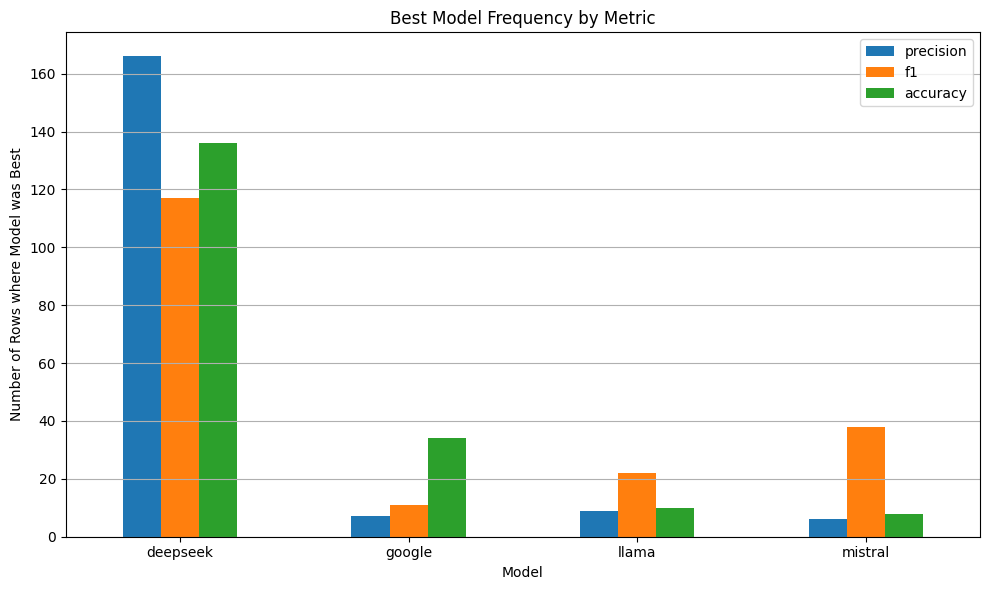

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences for each best model type
precision_counts = df['best_model_precision'].value_counts()
f1_counts = df['best_model_f1'].value_counts()
accuracy_counts = df['best_model_accuracy'].value_counts()

# Combine into a DataFrame
best_model_summary = pd.DataFrame({
    'precision': precision_counts,
    'f1': f1_counts,
    'accuracy': accuracy_counts
}).fillna(0).astype(int)

# Display summary table
print(best_model_summary)

# Plot grouped bar chart
best_model_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Best Model Frequency by Metric')
plt.ylabel('Number of Rows where Model was Best')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import ast

# Carica il file Deepseek originale
df = pd.read_excel("/content/quality-quantitative comparison.xlsx")  # cambia il nome se serve

# Interpreta la colonna deepseek_threats come lista
df['deepseek_threats'] = df['deepseek_threats'].apply(ast.literal_eval)

# Esplodi le minacce una per riga
df_exploded = df.explode('deepseek_threats')

# Rinomina la colonna per chiarezza
df_exploded = df_exploded.rename(columns={'deepseek_threats': 'threat'})

# Pulisce eventuali spazi / lowercase
df_exploded['threat'] = df_exploded['threat'].str.strip().str.lower()

# Salva il file da compilare manualmente
df_exploded.to_excel("/content/deepseek_flat_for_manual_scoring.xlsx", index=False)

df_exploded.head()

,guid,threat
0,1033011463,supply chain compromise
0,1033011463,damage / destruction of the satellite via the ...
1,1034554118,spoofing
1,1034554118,jamming
2,1033802407,firmware corruption


In [ ]:
import pandas as pd

# Carica il file Deepseek che hai preparato manualmente
df_deepseek_qual = pd.read_excel("/content/deepseek_flat_for_manual_scoring.xlsx")
df_deepseek_qual['threat'] = df_deepseek_qual['threat'].str.lower().str.strip()


In [ ]:
df_quant = pd.read_excel("/content/per_row_scores_enriched.x.xlsx")
df_quant['guid'] = df_quant.index  # Crea un ID se non presente

# Assicura che i dizionari siano interpretati come oggetti
df_quant['threats_percentages'] = df_quant['threats_percentages'].apply(eval)


In [ ]:
import pandas as pd
import ast # Import the ast module

# Carica i file
df_deepseek_qual = pd.read_excel("/content/deepseek_flat_for_manual_scoring.xlsx")
df_deepseek_qual['threat'] = df_deepseek_qual['threat'].str.lower().str.strip()

# Assicura che la colonna con i dizionari venga letta correttamente
# Usa ast.literal_eval per una valutazione sicura delle stringhe come dizionari
# Aggiungi un try-except per gestire eventuali valori che non sono stringhe valide di dizionari
def safe_literal_eval(item):
    try:
        # Check if the item is a string before trying to evaluate
        if isinstance(item, str):
            return ast.literal_eval(item)
        # If it's already a dictionary or other structure, return it as is
        return item
    except (ValueError, SyntaxError, TypeError):
        # Return an empty dictionary or similar for unparseable items
        return {}

df_quant = pd.read_excel("/content/per_row_enriched.x.xlsx")
df_quant['guid'] = df_quant.index  # Solo se necessario

df_quant['threats_percentages'] = df_quant['threats_percentages'].apply(safe_literal_eval)


# Trasforma il dizionario in righe separate: una per ogni threat associato a un guid
# Ensure we only explode columns that are iterable (like lists or dictionaries)
# First, convert dictionaries to a list of (key, value) pairs to make them explode-friendly
df_quant['threats_percentages_list'] = df_quant['threats_percentages'].apply(
    lambda d: list(d.items()) if isinstance(d, dict) else []
)

df_expanded = df_quant.explode('threats_percentages_list')

# Estrai il threat e il valore percentuale dalla tupla creata dall'explode
df_expanded = df_expanded.dropna(subset=['threats_percentages_list'])  # Evita errori su celle vuote dall'explode
df_expanded['threat'] = df_expanded['threats_percentages_list'].apply(lambda x: x[0].strip().lower() if isinstance(x, tuple) and len(x) > 0 else None)
df_expanded['percentage'] = df_expanded['threats_percentages_list'].apply(lambda x: x[1] if isinstance(x, tuple) and len(x) > 1 else None)

# Drop rows where threat extraction failed
df_expanded = df_expanded.dropna(subset=['threat', 'percentage'])


# Applica la classificazione qualitativa
def classify_risk(pct):
    # Ensure pct is a number before comparison
    if not isinstance(pct, (int, float)):
        return None # Or some other indicator for invalid data
    if pct <= 35.0:
        return 'Low'
    elif pct <= 67.0:
        return 'Low-Medium'
    else:
        return 'Medium-High'

df_expanded['risk_level'] = df_expanded['percentage'].apply(classify_risk)

# Convert the 'guid' columns to string type before merging
df_deepseek_qual['guid'] = df_deepseek_qual['guid'].astype(str)
df_expanded['guid'] = df_expanded['guid'].astype(str)


# Ora unisci con il dataframe qualitativo (se necessario)
# Ad esempio, se vuoi aggiungere la classificazione al tuo file di scoring manuale:
merged_df = pd.merge(
    df_deepseek_qual,
    df_expanded[['guid', 'threat', 'risk_level']],
    on=['guid', 'threat'],
    how='left'
)

# Salva o visualizza il risultato
merged_df.to_excel("/content/deepseek_with_qualitative_scores.xlsx", index=False)
print(merged_df.head())

         guid                                             threat  \
0  1033011463                            supply chain compromise   
1  1033011463  damage / destruction of the satellite via the ...   
2  1034554118                                           spoofing   
3  1034554118                                            jamming   
4  1033802407                                firmware corruption   

  confidence_qualitative risk_level  
0                    Low        NaN  
1                 Medium        NaN  
2                 Medium        NaN  
3                   High        NaN  
4                   High        NaN  
